# week 7

### 1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요

In [1]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

### 1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body shape로 변수 분리하세요

In [6]:
df.info()
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   calory      10 non-null     int64 
 1   breakfast   10 non-null     int64 
 2   lunch       10 non-null     int64 
 3   dinner      10 non-null     int64 
 4   exercise    10 non-null     int64 
 5   body_shape  10 non-null     object
dtypes: int64(5), object(1)
memory usage: 560.0+ bytes
0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
5    Skinny
6    Normal
7       Fat
8    Normal
9       Fat
Name: body_shape, dtype: object


### 1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요

In [7]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

### 1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요

In [8]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=1)
pca.fit(x_std)
x_pca = pca.transform(x_std)
print(x_pca.shape)

(10, 1)


### 1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요

In [10]:
pca.explained_variance_ratio_

array([0.73183217])

### 1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수 즉 차원 수 d를 구하세요

In [11]:
import numpy as np

pca = PCA()
pca.fit(x_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
d

4

### 1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_std)
X_reduced.shape

(10, 4)

### 1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요

In [13]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(10, 5)

### 1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)




In [14]:
rnd_pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(x_std)
X_reduced.shape

(10, 2)

### 1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요




In [15]:
from sklearn.decomposition import IncrementalPCA

In [16]:
n_batches = 2
inc_pca = IncrementalPCA(n_components=4)
for X_batch in np.array_split(x_std, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(x_std)
X_reduced.shape

(10, 4)

### 1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요


In [17]:
from sklearn.decomposition import KernelPCA

In [18]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(x_std)
X_reduced.shape

(10, 2)

### 1.12 커널 PCA의 하이퍼파라미터를 선택하세요 kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.
이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [20]:
clf = Pipeline([ ("kpca",KernelPCA(n_components = 2)),
                 ("log_reg", LogisticRegression(solver="lbfgs"))])
param_grid = [{"kpca__gamma":np.linspace(0.03,0.05,1,2,10),
               "kpca__kernel":["linear","poly","rbf","sigmoid","cosine"]}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_std,y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/pyt

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': (array([0.03]), nan),
                          'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'cosine']}])

### 2.1 다음 iris 데이터 세트를 출력해주세요

In [21]:
from sklearn.datasets import load_iris
iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

### 2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요

In [23]:
from sklearn.preprocessing import StandardScaler
X = irisDF.drop('target',axis=1)
y = irisDF['target']
x_std = StandardScaler().fit_transform(X)

### 2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요

In [24]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
pca.fit(x_std)
iris_pca = pca.transform(x_std)
iris_pca.shape

(150, 2)

### 2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요

In [28]:
pca_columns = ['pca_component1', 'pca_component2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target'] = y
df_pca.head(3)

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### 2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [30]:
xgb = XGBClassifier(random_state=15)
scores = cross_val_score(xgb,x_std,y,scoring='accuracy',cv=3)
print("원본 데이터 교차검증 개별 정확도: ",scores)
print("원본 데이터 평균 정확도: ",np.mean(scores))

원본 데이터 교차검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [31]:
pca_X = df_pca[['pca_component1', 'pca_component2']]
scores_pca = cross_val_score(xgb,pca_X,y,scoring='accuracy',cv=3)
print("pca 데이터 교차검증 개별 정확도: ",scores_pca)
print("pca 데이터 평균 정확도: ",np.mean(scores_pca))

pca 데이터 교차검증 개별 정확도:  [0.92 0.88 0.9 ]
pca 데이터 평균 정확도:  0.9


### 3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.

In [32]:
from sklearn.datasets import load_wine

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

### 3.2 X에는 features를 y에는 target을 저장해주세요.

In [33]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
X = df.drop('target',axis=1)
y = df['target']

### 3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.

In [34]:
X.shape

(178, 13)

### 3.4 X의 행 5개를 확인해주세요.

In [35]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3.5 target들의 종류를 확인해주세요.

In [39]:
y.unique()

array([0, 1, 2])

### 3.6 X_lda에 lda를 fit해주세요. 

In [40]:
x_scaled = StandardScaler().fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_scaled, y)
X_lda = lda.transform(x_scaled)
X_lda.shape

(178, 2)

### 3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

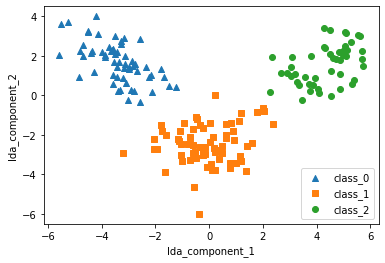

In [42]:
lda_columns = ['lda_component_1','lda_component_2']
df_lda = pd.DataFrame(X_lda,columns = lda_columns)
df_lda['target'] = wine.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data = df_lda[df_lda['target'] == i]['lda_component_1']
  y_axis_data = df_lda[df_lda['target'] == i]['lda_component_2']

  plt.scatter(x_axis_data,y_axis_data,marker = marker,label = wine.target_names[i])

plt.legend(loc = 'lower right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()